In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [23]:
titanic = sns.load_dataset('titanic')

In [24]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [25]:
titanic.drop(['class', 'adult_male', 'who','alive'], axis=1, inplace=True)

In [26]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,Southampton,True


In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
deck           203 non-null category
embark_town    889 non-null object
alone          891 non-null bool
dtypes: bool(1), category(1), float64(2), int64(4), object(3)
memory usage: 64.8+ KB


In [30]:
titanic.isnull().sum(axis = 0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
deck           688
embark_town      2
alone            0
dtype: int64

In [37]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,Southampton,True


In [45]:
#titanic.loc[:,'survived']
#titanic.survived
#titanic['survived']

In [47]:
titanic.survived.sum()/titanic.survived.count()

0.3838383838383838

In [49]:
titanic.survived.mean() # hayatta kalanlar orani

0.3838383838383838

In [50]:
1 - titanic.survived.mean() # hayatta kalanlar orani

0.6161616161616161

In [51]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [52]:
titanic.groupby(['survived']).mean()

,pclass,age,sibsp,parch,fare,alone
survived,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.681239
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.476608


In [53]:
titanic.groupby(['survived', 'sex']).mean()

pclass        age     sibsp     parch       fare     alone
survived sex                                                                 
0        female  2.851852  25.046875  1.209877  1.037037  23.024385  0.333333
         male    2.476496  31.618056  0.440171  0.207265  21.960993  0.741453
1        female  1.918455  28.847716  0.515021  0.515021  51.938573  0.424893
         male    2.018349  27.276022  0.385321  0.357798  40.821484  0.587156

In [56]:
fakir_indis, zengin_indis = (titanic.pclass == 3), (titanic.pclass == 1)

In [62]:
titanic[zengin_indis].survived.head(3)

1    1
3    1
6    0
Name: survived, dtype: int64

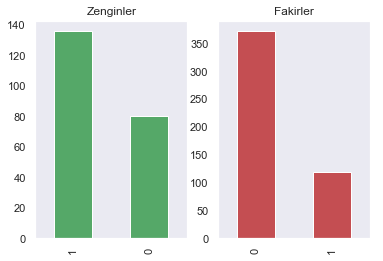

In [58]:
plt.subplot(1, 2, 1)
titanic[zengin_indis].survived.value_counts().plot(kind = 'bar', color = 'g')
plt.title("Zenginler")
plt.grid()

plt.subplot(1, 2, 2)
titanic[fakir_indis].survived.value_counts().plot(kind = 'bar', color = 'r')
plt.title("Fakirler")
plt.grid()